In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# Load the datasets
census_df = pd.read_csv('/Users/jeffkole/Documents/external/Demos/census.csv')
census_synth_df = pd.read_csv('/Users/jeffkole/Documents/external/Demos/Census_synth_2018.csv')
census_mock_df = pd.read_csv('/Users/jeffkole/Documents/external/Demos/census_mock_data1.csv')

In [4]:
# Compute the correlation matrices
census_corr = census_df.corr()
census_synth_corr = census_synth_df.corr()
census_mock_corr = census_mock_df.corr()

/var/folders/dd/rqm_54c933d938kptz1mjn040000gn/T/ipykernel_59335/4094370687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  census_corr = census_df.corr()
/var/folders/dd/rqm_54c933d938kptz1mjn040000gn/T/ipykernel_59335/4094370687.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  census_synth_corr = census_synth_df.corr()
/var/folders/dd/rqm_54c933d938kptz1mjn040000gn/T/ipykernel_59335/4094370687.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  census_mock_corr = cens

In [5]:
# Determine significance coloring
def significance_coloring(correlation_matrix, df):
    n = df.shape[0]
    colors = correlation_matrix.copy()
    t_statistic = correlation_matrix.values * (n - 2)**0.5 / (1 - correlation_matrix.values**2)**0.5
    p_values = 2 * (1 - t.cdf(abs(t_statistic), n-2))
    for i in range(colors.shape[0]):
        for j in range(colors.shape[1]):
            if p_values[i, j] < 0.01:
                colors.iloc[i, j] = "darkgreen"
            elif p_values[i, j] < 0.05:
                colors.iloc[i, j] = "mediumgreen"
            elif p_values[i, j] < 0.10:
                colors.iloc[i, j] = "lightgreen"
            else:
                colors.iloc[i, j] = "none"
    return colors

color_mapping_updated = {
    "darkgreen": "#006400",
    "mediumgreen": "#32CD32",
    "lightgreen": "#98FB98",
    "none": "#D3D3D3"
}

census_colors = significance_coloring(census_corr, census_df).replace(color_mapping_updated)
census_synth_colors = significance_coloring(census_synth_corr, census_synth_df).replace(color_mapping_updated)
census_mock_colors = significance_coloring(census_mock_corr, census_mock_df).replace(color_mapping_updated)

/var/folders/dd/rqm_54c933d938kptz1mjn040000gn/T/ipykernel_59335/4265978560.py:5: RuntimeWarning: divide by zero encountered in divide
  t_statistic = correlation_matrix.values * (n - 2)**0.5 / (1 - correlation_matrix.values**2)**0.5


In [6]:
# Plotting function with custom text color and full legend
def plot_correlation_matrix_with_full_legend(corr_matrix, colors_matrix, title, file_name):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".4f", 
                linewidths=0.5, cmap="Greens", cbar=False, 
                vmin=-1, vmax=1, ax=ax, annot_kws={"size": 10, "color": "white"})
    for i in range(colors_matrix.shape[0]):
        for j in range(colors_matrix.shape[1]):
            color = colors_matrix.iloc[i, j]
            if i != j:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color))
            if color in [color_mapping_updated["lightgreen"], color_mapping_updated["none"]]:
                ax.text(j+0.5, i+0.5, format(corr_matrix.iloc[i, j], ".4f"), 
                        horizontalalignment="center", verticalalignment="center", color="black", size=10)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping_updated["darkgreen"], markersize=10, label='99% confidence'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping_updated["mediumgreen"], markersize=10, label='95% confidence'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping_updated["lightgreen"], markersize=10, label='90% confidence'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping_updated["none"], markersize=10, label='< 90% confidence')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_title(title, fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()

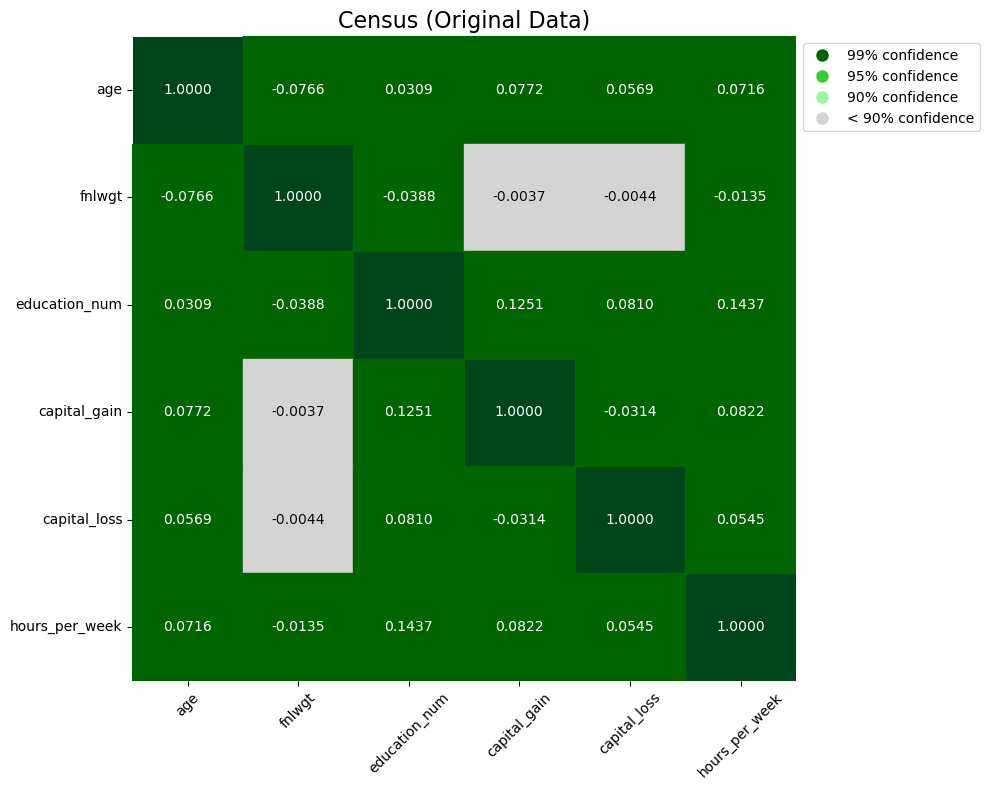

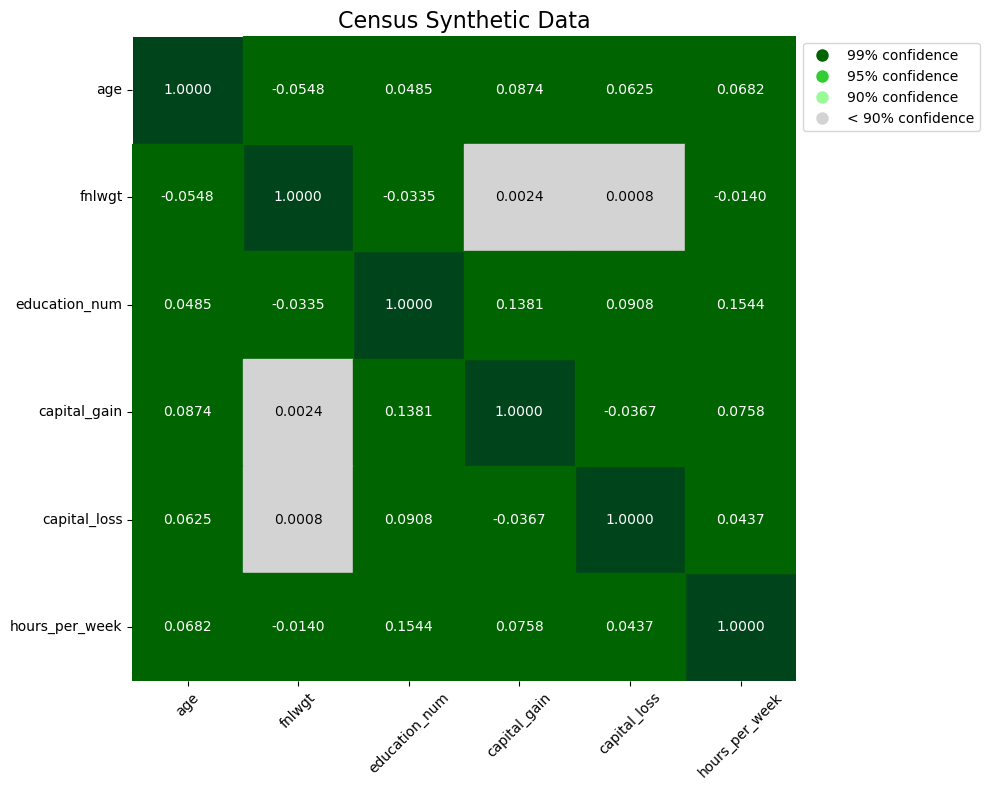

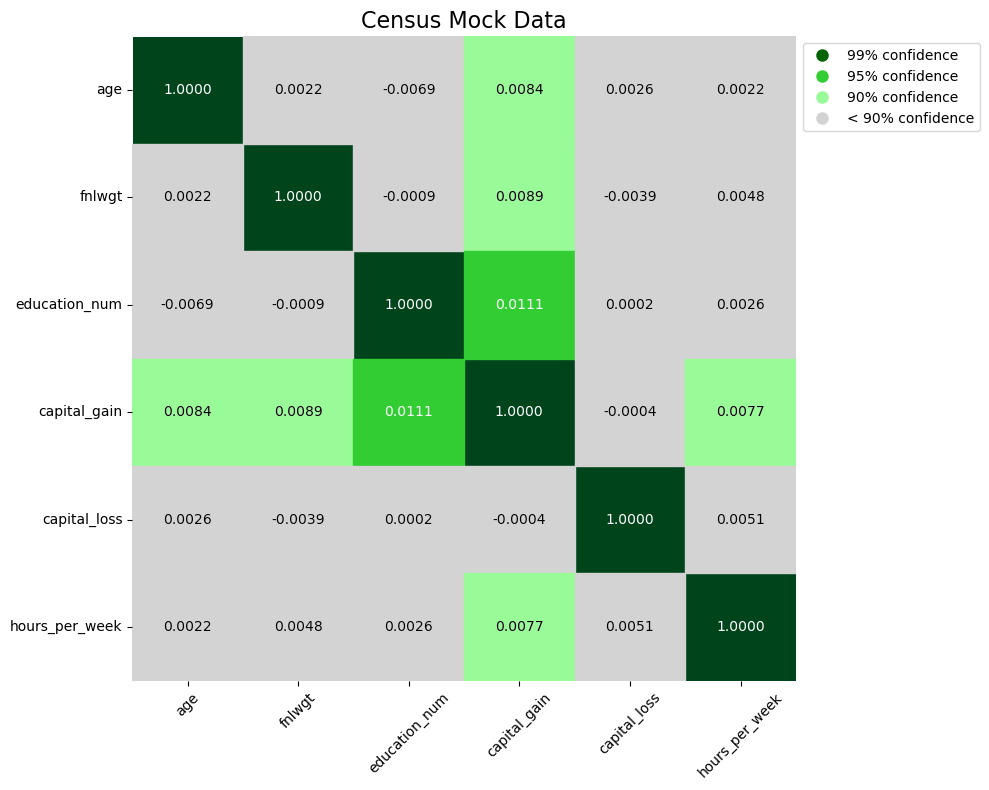

In [7]:
# Generate and save the correlation matrix plots
plot_correlation_matrix_with_full_legend(census_corr, census_colors, "Census (Original Data)", "census_target_data.png")
plot_correlation_matrix_with_full_legend(census_synth_corr, census_synth_colors, "Census Synthetic Data", "census_synthetic_data.png")
plot_correlation_matrix_with_full_legend(census_mock_corr, census_mock_colors, "Census Mock Data", "census_mock_data.png")
